# Exploratory Analysis of Loan Data from Prosper

## Preliminary Wrangling

This notebook explores a dataset containing 113,937 loans with 81 fields on each loan.

In [1]:
# importing all necessary packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the data into a dataframe

In [2]:
# reading the CSV and loading the data into a dataframe
loan_data = pd.read_csv('prosperLoanData.csv', index_col=None)
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# getting the shape of the dataset
loan_data.shape

(113937, 81)

In [4]:
# converting loan origination date to datetime format
loan_data.LoanOriginationDate = pd.to_datetime(loan_data.LoanOriginationDate)
loan_data.LoanOriginationDate.dtype

dtype('<M8[ns]')

In [5]:
# sorting loan data in ascending order of loan origination date
loan_data = loan_data.sort_values(by='LoanOriginationDate')

There are 81 fields available for each of the loan records. We will focus on only a few (20 fields) of these fields for further exploratory analysis. So, we can remove the rest of the fields from the dataset.

In [6]:
# retaining only the required columns in the dataframe
loan_data = loan_data[['LoanNumber', 'LoanOriginalAmount', 'LoanOriginationQuarter', 'Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'IsBorrowerHomeowner']]
loan_data.shape

(113937, 11)

In [7]:
# renaming the columns
loan_data.columns = ['loan_number', 'loan_original_amount', 'loan_origination_quarter', 'term', 'loan_status', 
                     'borrower_APR', 'prosper_rating', 'employment_status', 'employment_status_duration', 
                     'stated_monthly_income', 'is_borrower_homeowner']
loan_data.head()

,loan_number,loan_original_amount,loan_origination_quarter,term,loan_status,borrower_APR,prosper_rating,employment_status,employment_status_duration,stated_monthly_income,is_borrower_homeowner
113921,1,1000,Q4 2005,36,Completed,NaN,NaN,NaN,NaN,12500.000000,False
62297,2,1000,Q4 2005,36,Completed,NaN,NaN,NaN,NaN,10000.000000,False
78414,3,2000,Q4 2005,36,Completed,NaN,NaN,NaN,NaN,8333.333333,False
73945,4,2500,Q4 2005,36,Completed,NaN,NaN,NaN,NaN,29166.666667,False
25166,5,1000,Q4 2005,36,Completed,NaN,NaN,NaN,NaN,9166.666667,False


In [8]:
# getting information regarding data type and missing values for each field
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 113921 to 31260
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_number                 113937 non-null  int64  
 1   loan_original_amount        113937 non-null  int64  
 2   loan_origination_quarter    113937 non-null  object 
 3   term                        113937 non-null  int64  
 4   loan_status                 113937 non-null  object 
 5   borrower_APR                113912 non-null  float64
 6   prosper_rating              84853 non-null   object 
 7   employment_status           111682 non-null  object 
 8   employment_status_duration  106312 non-null  float64
 9   stated_monthly_income       113937 non-null  float64
 10  is_borrower_homeowner       113937 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 9.7+ MB


> Handling the missing values and changing data types of fields (wherever necessary) in the dataset

We observe that the following fields have missing values - `prosper_rating`, `borrower_APR`, `employment_status` and `employment_status_duration`

The data types of the fields should also be checked before proceeding with the exploratory analysis. `employment_status`, `prosper_rating`, `loan_origination_quarter` and `loan_status` should be categorical fields rather than strings.

(1) `prosper_rating`

> The prosper rating is said to be available only for the loans originated after July 2009. The missing values could be because the loan was originated before the third quarter (Q3) of 2009. Let's check this.

In [9]:
# getting the unique qurters of loan origination for records with missing prosper rating
loan_data[loan_data.prosper_rating.isnull()].loan_origination_quarter.unique()

array(['Q4 2005', 'Q1 2006', 'Q2 2006', 'Q3 2006', 'Q4 2006', 'Q1 2007',
       'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008',
       'Q4 2008', 'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010',
       'Q3 2010', 'Q4 2010'], dtype=object)

> We can remove the records where prosper rating is not available and loan origination quarter is Q3 2009 & later.

In [10]:
# getting the number of records to be dropped
loan_data[(loan_data.prosper_rating.isnull()) & (loan_data.loan_origination_quarter.isin(['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010']))].count()[0]

131

In [11]:
# dropping the records with missing values which cannot be imputed
loan_data_to_be_dropped = loan_data[(loan_data.prosper_rating.isnull()) & (loan_data.loan_origination_quarter.isin(['Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010']))]

loan_data.drop(loan_data_to_be_dropped.index, inplace=True)
loan_data.shape

(113806, 11)

In [12]:
# getting the unique values of prosper rating
loan_data.prosper_rating.unique()

array([nan, 'AA', 'E', 'C', 'D', 'A', 'HR', 'B'], dtype=object)

In [13]:
# replacing null values with N/A (prosper rating not available)
loan_data.prosper_rating.fillna('N/A', inplace=True)
(loan_data[loan_data.prosper_rating == 'N/A']).count()[0]

28953

In [14]:
# converting the field to ordered categorical data type
# 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

# ordered list of categories 
ordered_categories = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

# converting to ordered categorical field
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
loan_data.prosper_rating = loan_data.prosper_rating.astype(ordered_var)

# checking if the conversion is successful
loan_data.prosper_rating.dtype

CategoricalDtype(categories=['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

(2) `employment_status`

In [15]:
# getting the unique values of employment status
loan_data.employment_status.unique()

array([nan, 'Not available', 'Full-time', 'Part-time', 'Retired',
       'Self-employed', 'Not employed', 'Employed', 'Other'], dtype=object)

In [16]:
loan_data.employment_status.isna().sum()

2255

In [17]:
# drop records with employment status not available
loan_data.dropna(subset=['employment_status'], inplace=True)
loan_data.shape

(111551, 11)

In [18]:
# converting employment status to category data type
loan_data.employment_status = loan_data.employment_status.astype('category')

(3) `loan_status` 

In [19]:
# getting the unique values of loan status
loan_data.loan_status.unique()

array(['Completed', 'Cancelled', 'Chargedoff', 'Defaulted', 'Current',
       'Past Due (1-15 days)', 'Past Due (91-120 days)',
       'Past Due (61-90 days)', 'FinalPaymentInProgress',
       'Past Due (31-60 days)', 'Past Due (16-30 days)',
       'Past Due (>120 days)'], dtype=object)

In [20]:
# converting loan status to category data type
loan_data.loan_status = loan_data.loan_status.astype('category')

(4) `borrower_APR`

In [21]:
# getting the number of missing values in borrower APR
loan_data.borrower_APR.isnull().sum()

0

> Looks like the previous clean up efforts have eliminated all the records where borrower APR is not available. Let's move on to the next issue.

(5) `employment_status_duration`

> Are the missing values corresponding to the employment status duration due to some of the loan applicants being unemployed? Let's find out.

In [22]:
# getting the number of missing values in employment status duration
loan_data.employment_status_duration.isnull().sum()

5370

In [23]:
#creating a dataframe containing only those records where employment status duration is not available
emp_status_duration_na_loan_data = loan_data[loan_data.employment_status_duration.isnull()]
emp_status_duration_na_loan_data.shape

(5370, 11)

In [24]:
# getting the counts of employment status of the records with no employment status duration available
emp_status_duration_na_loan_data.employment_status.value_counts()

Not available    5347
Full-time          13
Other               6
Self-employed       2
Not employed        1
Employed            1
Retired             0
Part-time           0
Name: employment_status, dtype: int64

> Surprisingly, only 1 loan applicant's employee status duration is not available. Most of the do not have the employment status duration have employment status to 'Not available'. These values need to be removed from the dataframe for a clear analysis
>
> There are few other records with different employment status and do not have the employment status duration. Let us drop all records where employment status duration is not available.

In [25]:
# getting all records where employment status is 'Not available'
loan_data_to_be_dropped = loan_data[loan_data.employment_status == "Not available"]

# dropping all records where employment status is 'Not available'
loan_data.drop(loan_data_to_be_dropped.index, inplace=True)
loan_data.shape

(106204, 11)

In [26]:
#creating a dataframe containing only those records where employment status duration is not available
emp_status_duration_na_loan_data = loan_data[loan_data.employment_status_duration.isnull()]
emp_status_duration_na_loan_data.shape

(23, 11)

In [27]:
# getting the counts of employment status of the records with no employment status duration available
emp_status_duration_na_loan_data.employment_status.value_counts()

Full-time        13
Other             6
Self-employed     2
Not employed      1
Employed          1
Retired           0
Part-time         0
Not available     0
Name: employment_status, dtype: int64

In [28]:
#creating a dataframe containing only those records where employment status duration is not available and employment status is not 'Not available'
loan_data_to_be_dropped = loan_data[(loan_data.employment_status_duration.isnull()) & (loan_data.employment_status != "Not available")]
loan_data_to_be_dropped.shape

(23, 11)

In [29]:
# dropping all records that do not have employee status duration and employment status is not 'Not available'
loan_data.drop(loan_data_to_be_dropped.index, inplace=True)
loan_data.shape

(106181, 11)

(6) `loan_origination_quarter`

In [30]:
# ordered list of categories 
ordered_categories = loan_data.loan_origination_quarter.unique()

# converting to ordered categorical field
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_categories)
loan_data.loan_origination_quarter = loan_data.loan_origination_quarter.astype(ordered_var)

# checking if the conversion is successful
loan_data.loan_origination_quarter.dtype

CategoricalDtype(categories=['Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008',
                  'Q2 2008', 'Q3 2008', 'Q4 2008', 'Q2 2009', 'Q3 2009',
                  'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010',
                  'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012',
                  'Q2 2012', 'Q3 2012', 'Q4 2012', 'Q1 2013', 'Q2 2013',
                  'Q3 2013', 'Q4 2013', 'Q1 2014'],
                 ordered=True)

> Verification

In [31]:
# checking missing values and data type for each field
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106181 entries, 17308 to 31260
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   loan_number                 106181 non-null  int64   
 1   loan_original_amount        106181 non-null  int64   
 2   loan_origination_quarter    106181 non-null  category
 3   term                        106181 non-null  int64   
 4   loan_status                 106181 non-null  category
 5   borrower_APR                106181 non-null  float64 
 6   prosper_rating              106181 non-null  category
 7   employment_status           106181 non-null  category
 8   employment_status_duration  106181 non-null  float64 
 9   stated_monthly_income       106181 non-null  float64 
 10  is_borrower_homeowner       106181 non-null  bool    
dtypes: bool(1), category(4), float64(3), int64(3)
memory usage: 6.2 MB


> There are now, no missing values in the dataframe.

In [32]:
# getting the quartile values and other statistics for the numerical fields
loan_data.describe()

,loan_number,loan_original_amount,term,borrower_APR,employment_status_duration,stated_monthly_income
count,106181.00000,106181.000000,106181.000000,106181.000000,106181.000000,1.061810e+05
mean,74173.55670,8571.843324,41.182848,0.220268,96.098511,5.671257e+03
std,35981.94247,6267.426288,10.725092,0.080890,94.502961,7.611292e+03
min,7495.00000,1000.000000,12.000000,0.006530,0.000000,0.000000e+00
25%,43799.00000,4000.000000,36.000000,0.157130,26.000000,3.330167e+03
50%,73219.00000,7000.000000,36.000000,0.210610,67.000000,4.750000e+03
75%,103808.00000,12000.000000,36.000000,0.285740,137.000000,6.916667e+03
max,136486.00000,35000.000000,60.000000,0.423950,755.000000,1.750003e+06


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features out of which we have retained 11 features in order to limit the scope of the analysis. Most variables are numeric in nature, but the variables `loan_status`, `employment_status` and `prosper_rating` are categorical in nature. Further, `prosper_rating` is ordered.
>
> After cleaning up the data during preliminary data wrangling process, we are left with 106181 records which have no missing values and appropriate data type for each feature.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the `borrower_APR`. The Borrower APR (Annual Percentage Rate) is the annual cost of a loan to a borrower. Unlike an interest rate, it includes other charges or fees (such as mortgage  insurance, most closing costs, discount points and loan origination  fees) to reflect the total cost of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the `employment_status`, `term`, `prosper_rating`, `loan_original_amount` and `employment_status_duration`  of the borrower to play a major role in the analysis.

### Utility Functions

> These functions will be used so as to avoid repeatation of code that will be frequently required

In [33]:
# if variable is a discrete numerical variable, a continuously binned histogram can be confusing, 
# we set the width of the bars to 70% of the actual width and modify the ticks

# function to plot a histogram
def draw_histogram(data, x, bins, x_ticks, x_label, y_label, title, discrete_variable, rotation=0):
    # setting the figure size
    plt.figure(figsize=[10, 8])
    
    # setting the bar width to 0.7 if the variable is discrete
    if discrete_variable:
        rwidth = 0.7
    else:
        rwidth = 1
    
    # plotting the histogram
    plt.hist(data = data, x = x, bins = bins, rwidth = rwidth)
    # specifying the X and Y axes labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # specifying the X ticks and rotation
    plt.xticks(x_ticks, rotation=rotation)
    # setting the title of the plot
    plt.title(title);

In [34]:
# function to plot a countplot
def draw_countplot(data, x, x_label, y_label, title, ordered, rotation=0):
    # set figure size
    plt.figure(figsize=(10, 8))

    # setting the color to blue
    default_color = sb.color_palette()[0]
    
    # plotting the countplot
    if not ordered:
        g = sb.countplot(x=x, data=data, color=default_color, order = data[x].value_counts().index)
    else:
        g = sb.countplot(x=x, data=data, color=default_color)
    # specifying the X tick labels
    g.set_xticklabels(g.get_xticklabels(), rotation=rotation)
    # specifying the X and Y axes labels
    g.set_xlabel(x_label)
    g.set_ylabel(y_label)
    # setting the title of the plot
    g.set_title(title);

## Univariate Exploration

> Let's take a look at the feature of interest - `borrower_APR`

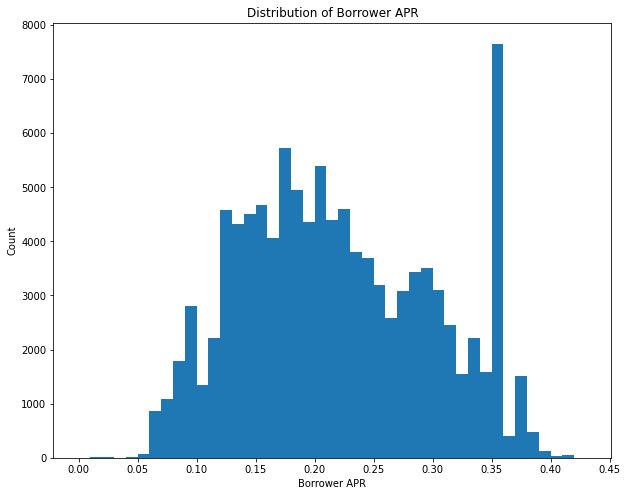

In [35]:
# defining the bins
binsize = 0.01
bins = np.arange(0, loan_data['borrower_APR'].max()+binsize, binsize)

# defining the X ticks
ticksize = 0.05
x_ticks = np.arange(0, loan_data['borrower_APR'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'borrower_APR', bins, x_ticks, 'Borrower APR', 'Count', 'Distribution of Borrower APR', False)

> The distribution of count of borrower APR has many peaks. The borrower APR with highest frequency lies between 0.35 and 0.36.
>
> Let us now explore the other numerical features in the dataset - `loan_original_amount`, `term`, `employment_status_duration` and `stated_monthly_income`

`loan_original_amount`

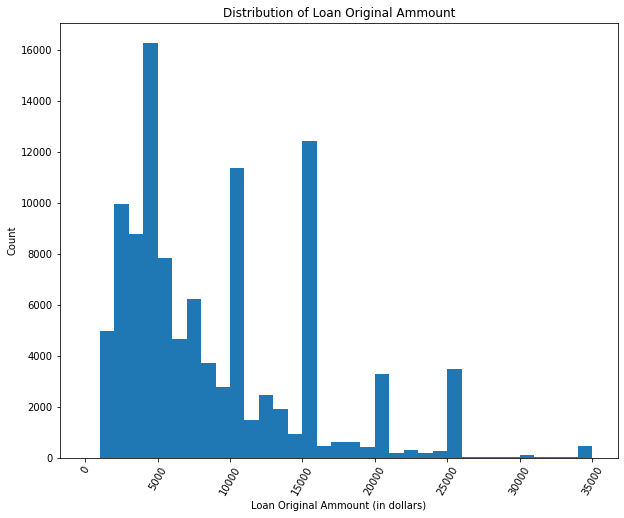

In [36]:
# defining the bins
binsize = 1000
bins = np.arange(0, loan_data['loan_original_amount'].max()+binsize, binsize)

# defining the X ticks
ticksize = 5000
x_ticks = np.arange(0, loan_data['loan_original_amount'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'loan_original_amount', bins, x_ticks, 'Loan Original Ammount (in dollars)', 'Count', 'Distribution of Loan Original Ammount', False, 60)

> The ditribution of the loan amount looks multimodal with peaks between 4k and 5k, 15k and 16k & 10k and 11k in decreasing order.

`term`

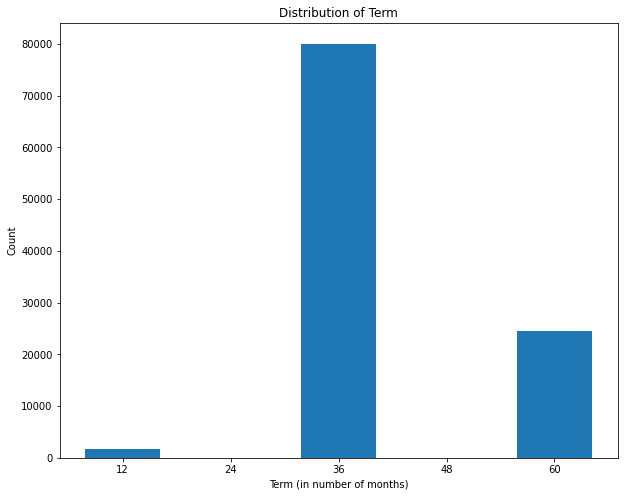

In [37]:
# defining the bins
binsize = 12
bins = np.arange(6, loan_data['term'].max()+18, binsize)

# defining the X ticks
ticksize = 12
x_ticks = np.arange(ticksize, loan_data['term'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'term', bins, x_ticks, 'Term (in number of months)', 'Count', 'Distribution of Term', True)

> Majority of the loans have a term of 3 years (36 months) followed by 5 years and 1 year.

`employment_status_duration`

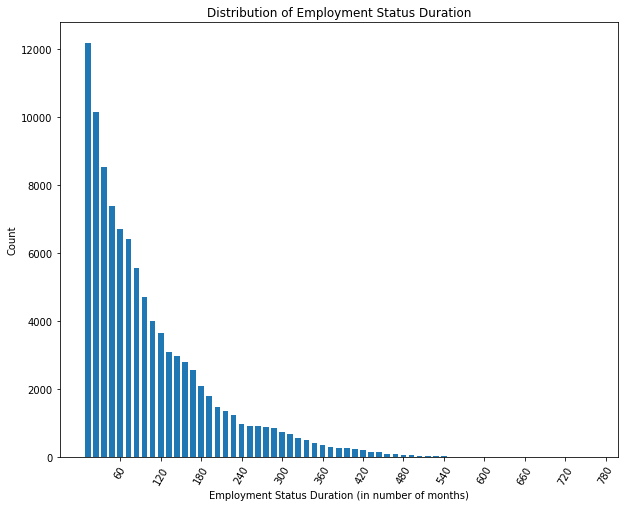

In [38]:
# defining the bins
binsize = 12
bins = np.arange(6, loan_data['employment_status_duration'].max()+18, binsize)

# defining the X ticks
ticksize = 60
x_ticks = np.arange(ticksize, loan_data['employment_status_duration'].max()+ticksize, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'employment_status_duration', bins, x_ticks, 'Employment Status Duration (in number of months)', 'Count', 'Distribution of Employment Status Duration', True, 60)

> The plot is heavily skewed to the right. Let's take a look at the records where employment status duration is 0.

In [39]:
# getting the records corresponding to employment status duration with value 0
loan_data[loan_data.employment_status_duration == 0]

,loan_number,loan_original_amount,loan_origination_quarter,term,loan_status,borrower_APR,prosper_rating,employment_status,employment_status_duration,stated_monthly_income,is_borrower_homeowner
6555,7539,2500,Q1 2007,36,Chargedoff,0.14438,N/A,Full-time,0.0,2601.666667,False
102916,7595,3500,Q1 2007,36,Completed,0.30564,N/A,Full-time,0.0,5250.000000,False
16383,7562,2500,Q1 2007,36,Completed,0.17722,N/A,Full-time,0.0,1166.666667,False
92554,7553,8200,Q1 2007,36,Completed,0.16195,N/A,Full-time,0.0,4166.666667,False
96016,7659,4850,Q1 2007,36,Chargedoff,0.29100,N/A,Full-time,0.0,3908.333333,False
...,...,...,...,...,...,...,...,...,...,...,...
17009,135513,15000,Q1 2014,36,Current,0.19029,C,Other,0.0,4583.333333,True
15622,136372,4000,Q1 2014,36,Current,0.21636,C,Other,0.0,1333.333333,False
83881,135632,8000,Q1 2014,60,Current,0.22780,D,Other,0.0,3072.250000,False
1017,136231,15000,Q1 2014,36,Current,0.07957,AA,Other,0.0,4666.666667,True


> These are probably employees who are just starting off their career and have taken loans for various developmental reasons.

`stated_monthly_income`

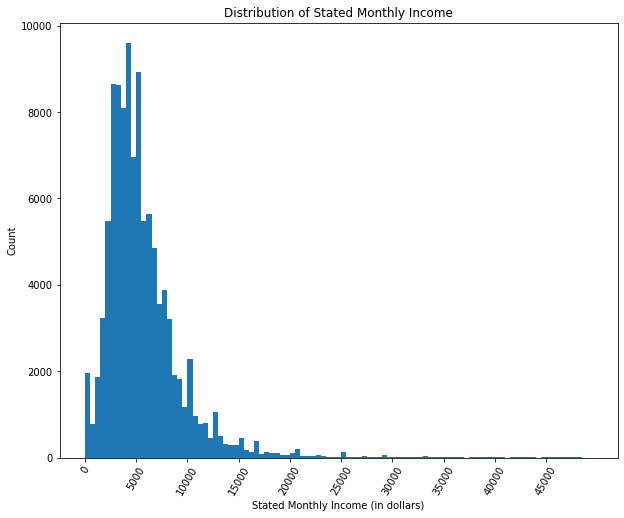

In [40]:
# defining the bins
binsize = 500
bins = np.arange(0, 50000, binsize)

# defining the X ticks
ticksize = 5000
x_ticks = np.arange(0, 50000, ticksize)

# plotting the histogram
draw_histogram(loan_data, 'stated_monthly_income', bins, x_ticks, 'Stated Monthly Income (in dollars)', 'Count', 'Distribution of Stated Monthly Income', False, 60)

> The plot is heavily skewed to the right just like the employment status duration which confirms that many of the loan applicants are just starting off theor career and hence do not make much money,
>
> Let us explore the categorical features (`loan_status`, `prosper_rating` and `employment_status`) next

`loan_status`

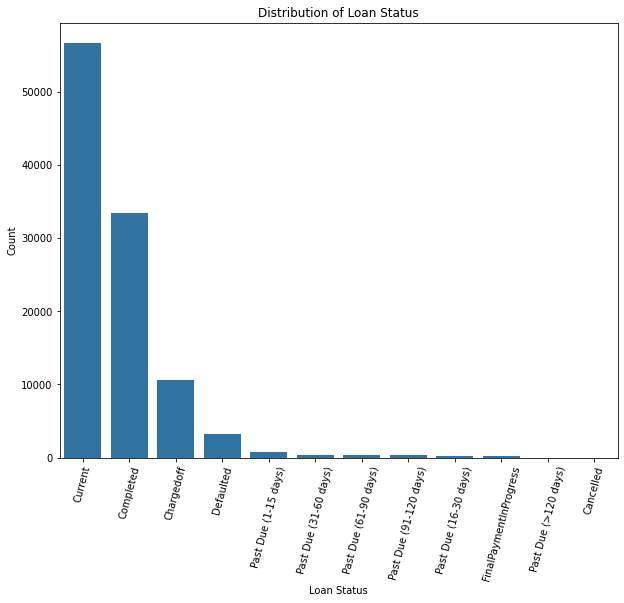

In [41]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='loan_status', x_label='Loan Status', y_label='Count', title='Distribution of Loan Status', ordered=False, rotation=75)

In [42]:
# getting the category-wise frequency
loan_data.loan_status.value_counts()

Current                   56566
Completed                 33426
Chargedoff                10628
Defaulted                  3288
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: loan_status, dtype: int64

> The most number of loans have **current status** and the least number of loans have **cancelled** status.

`prosper_rating`

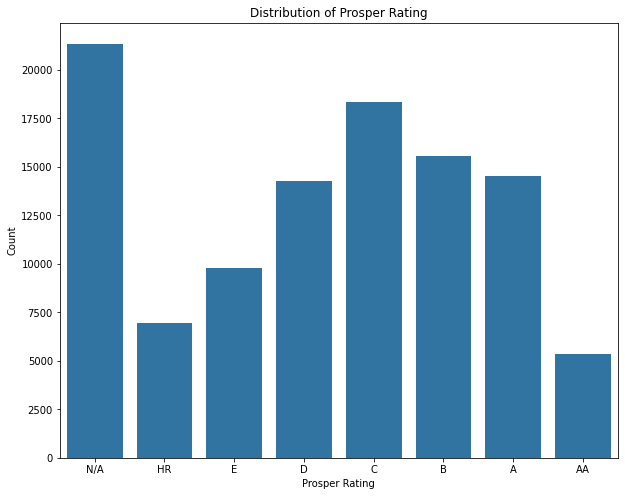

In [43]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='prosper_rating', x_label='Prosper Rating', y_label='Count', title='Distribution of Prosper Rating', ordered=True)

In [44]:
# getting the category-wise frequency
loan_data.prosper_rating.value_counts()

N/A    21347
C      18340
B      15579
A      14549
D      14268
E       9795
HR      6932
AA      5371
Name: prosper_rating, dtype: int64

> Many of the records have prosper rating as N/A since the loan origination date was before July 2009. The distribution of the rest of the ratings have an approximate normal distribution.

`employment_status`

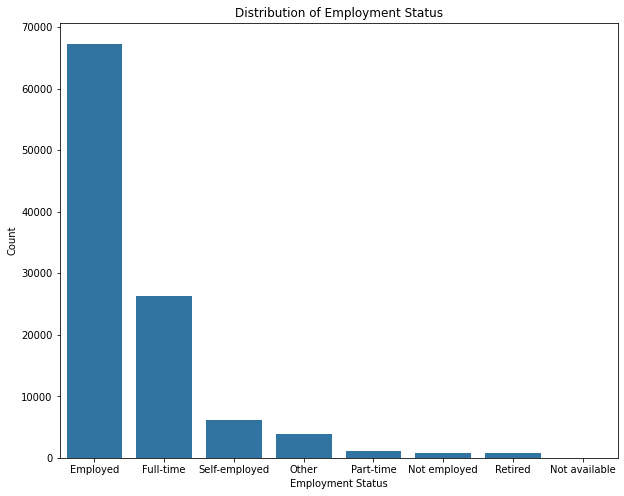

In [45]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='employment_status', x_label='Employment Status', y_label='Count', title='Distribution of Employment Status', ordered=False)

In [46]:
# getting the category-wise frequency
loan_data.employment_status.value_counts()

Employed         67309
Full-time        26238
Self-employed     6128
Other             3800
Part-time         1081
Not employed       834
Retired            791
Not available        0
Name: employment_status, dtype: int64

> From the above plot, we can see that the majority of loan applicants are employed (in one form or another). Only a negligible number of applicants are retired or not employed.

> To finish off, let's explore the other features (`is_borrower_homeowner` and `loan_origination_quarter`) to see if we can get any intersting insights

`is_borrower_homeowner`

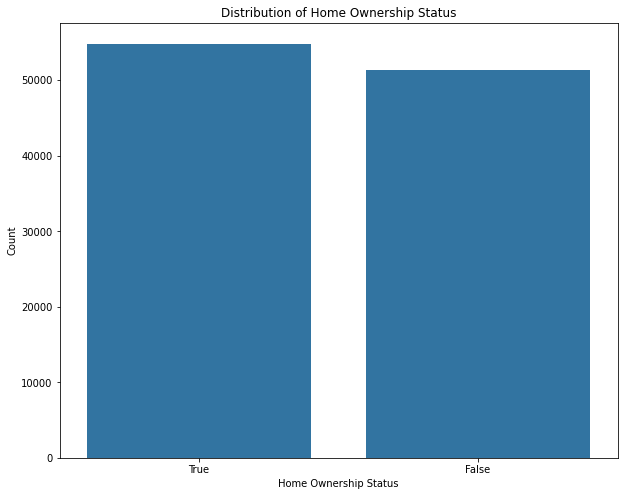

In [47]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='is_borrower_homeowner', x_label='Home Ownership Status', y_label='Count', title='Distribution of Home Ownership Status', ordered=False)

In [48]:
# getting the category-wise frequency
loan_data.is_borrower_homeowner.value_counts()

True     54840
False    51341
Name: is_borrower_homeowner, dtype: int64

> From the above countplot, we can observe that the number of loan applicants that own a home is slightly higher than those who don't. 

`loan_origination_quarter`

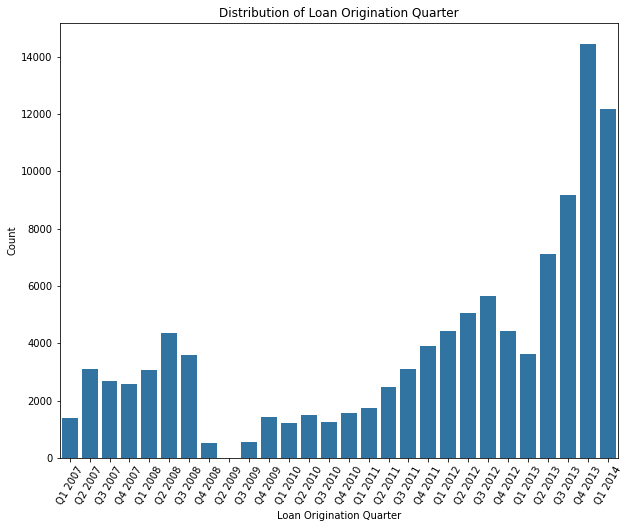

In [49]:
# plotting a countplot to visualize the distribution
draw_countplot(data=loan_data, x='loan_origination_quarter', x_label='Loan Origination Quarter', y_label='Count', title='Distribution of Loan Origination Quarter', ordered=True, rotation=60)

> We can observe that the number of loans originated quarter-wise has no consisent pattern. There is a dip during Q2 2009 and the most frequency is in all quarters of 2013 and Q1 of 2014.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable of interest if `borrower_APR`. The frequency distribution had many peaks. The plot is roughly normally distributed (bell shaped curve). No transformations were required to be performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Many of the `employment_status_duration` values were equal to zero which was a little unusual. On further investigation. the `stated_monthly_income` also followed the same pattern confirming the hypothesis that these records correspond to the applicants who are just starting off their career. No changes were made to clean up the data.

## Bivariate Exploration

> Let's start by looking at the pairwise correlation between the features of the dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!